<a href="https://colab.research.google.com/github/camigenius/Machine_lerarning/blob/master/tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import altair as alt

In [ ]:
df= pd.read_csv('inmuebles_bogota_res.csv')

In [ ]:
df.head()

Unnamed: 0 mtipoinmueble  mvalorventa  marea mnrocuartos mnrobanos  \
0           0   Apartamento    385000000  100.0           3         2   
1           1   Apartamento    190810000   34.0           1         2   
2           2   Apartamento    720000000  157.0           3         4   
3           3          Casa   1018660600  173.0           3         4   
4           4   Apartamento   1850000000  190.0           3         4   

   mnrogarajes         mzona              mbarrio   mnombrecomunbarrio  
0          1.0     Chapinero        ALFONSO LOPEZ             GALERIAS  
1          1.0         Norte            EL CODITO             EL REDIL  
2          2.0  Noroccidente            NIZA SUBA       Cerros De Niza  
3          1.0         Otros                  NaN                  NaN  
4          2.0         Norte  CERROS DE LOS ALPES  CERROS DE LOS ALPES

In [ ]:
(df['marea']==0).value_counts()

False    9049
True      951
Name: marea, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   mtipoinmueble       10000 non-null  object 
 2   mvalorventa         10000 non-null  int64  
 3   marea               10000 non-null  float64
 4   mnrocuartos         9993 non-null   object 
 5   mnrobanos           10000 non-null  object 
 6   mnrogarajes         9945 non-null   float64
 7   mzona               9812 non-null   object 
 8   mbarrio             9945 non-null   object 
 9   mnombrecomunbarrio  9866 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 781.4+ KB


In [ ]:
df.head()

Unnamed: 0 mtipoinmueble  mvalorventa  marea mnrocuartos mnrobanos  \
0           0   Apartamento    385000000  100.0           3         2   
1           1   Apartamento    190810000   34.0           1         2   
2           2   Apartamento    720000000  157.0           3         4   
3           3          Casa   1018660600  173.0           3         4   
4           4   Apartamento   1850000000  190.0           3         4   

   mnrogarajes         mzona              mbarrio   mnombrecomunbarrio  
0          1.0     Chapinero        ALFONSO LOPEZ             GALERIAS  
1          1.0         Norte            EL CODITO             EL REDIL  
2          2.0  Noroccidente            NIZA SUBA       Cerros De Niza  
3          1.0         Otros                  NaN                  NaN  
4          2.0         Norte  CERROS DE LOS ALPES  CERROS DE LOS ALPES

In [ ]:
df = df.drop(df[df['marea']==0].index)

In [ ]:
df

Unnamed: 0 mtipoinmueble  mvalorventa  marea mnrocuartos mnrobanos  \
0              0   Apartamento    385000000  100.0           3         2   
1              1   Apartamento    190810000   34.0           1         2   
2              2   Apartamento    720000000  157.0           3         4   
3              3          Casa   1018660600  173.0           3         4   
4              4   Apartamento   1850000000  190.0           3         4   
...          ...           ...          ...    ...         ...       ...   
9994         244   Apartamento    106000000   42.0           2         1   
9996         246          Casa    330000000   72.0           3         2   
9997         247          Casa   1200000000  400.0           3         4   
9998         248          Casa    642000000  191.0           4         4   
9999         249   Apartamento    380000000   79.3           3         2   

      mnrogarajes         mzona              mbarrio   mnombrecomunbarrio  
0             1.0     Chapinero        ALFONSO LOPEZ             GALERIAS  
1             1.0         Norte            EL CODITO             EL REDIL  
2             2.0  Noroccidente            NIZA SUBA       Cerros De Niza  
3             1.0         Otros                  NaN                  NaN  
4             2.0         Norte  CERROS DE LOS ALPES  CERROS DE LOS ALPES  
...           ...           ...                  ...                  ...  
9994          0.0    Occidental         CAMPO ALEGRE            EL TINTAL  
9996          1.0         Norte           LA LIBERIA       LAS MARGARITAS  
9997          3.0         Norte          EL CONTADOR          El Contador  
9998          2.0  Noroccidente  CIUDAD JARDIN NORTE            Gratamira  
9999          2.0  Noroccidente       SANTA HELENA I         SANTA HELENA  

[9049 rows x 10 columns]

In [ ]:
(df['marea']==0).value_counts()

False    9049
Name: marea, dtype: int64

In [ ]:
(df['mvalorventa']==0).value_counts()

False    9049
Name: mvalorventa, dtype: int64

In [ ]:
df['log_venta']=np.log10(df.mvalorventa)

In [ ]:
df['log_marea']=np.log10(df.marea)

In [ ]:
df[['log_marea','log_venta']].head()

log_marea  log_venta
0   2.000000   8.585461
1   1.531479   8.280601
2   2.195900   8.857332
3   2.238046   9.008030
4   2.278754   9.267172

In [ ]:
import altair as alt
#from vega_datasets import data

Area = df

alt.Chart(Area).mark_bar().encode(
    alt.X("log_marea:Q", bin=alt.Bin(maxbins=50)),
    y='count()',
    color="mnrocuartos:N"
).mark_bar(
    opacity=0.6,
    binSpacing=0.5
)

alt.Chart(...)

In [ ]:
import altair as alt
#from vega_datasets import data

Area = df

alt.Chart(Area).mark_bar().encode(
    alt.X("log_marea:Q", bin=alt.Bin(maxbins=50)),
    y='count()',
    color="mtipoinmueble:N"
).mark_bar(
    opacity=0.6,
    binSpacing=0.5
)

alt.Chart(...)

In [ ]:
import altair as alt
from vega_datasets import data

source = df

alt.Chart(source).mark_point().encode(
    x='log_marea:Q',
    y='log_venta:Q',
    color='mtipoinmueble:N',
    #href='url:N',
    #tooltip=['Name:N', 'url:N']
)

alt.Chart(...)

In [ ]:
df.head()

Unnamed: 0 mtipoinmueble  mvalorventa  marea mnrocuartos mnrobanos  \
0           0   Apartamento    385000000  100.0           3         2   
1           1   Apartamento    190810000   34.0           1         2   
2           2   Apartamento    720000000  157.0           3         4   
3           3          Casa   1018660600  173.0           3         4   
4           4   Apartamento   1850000000  190.0           3         4   

   mnrogarajes         mzona              mbarrio   mnombrecomunbarrio  \
0          1.0     Chapinero        ALFONSO LOPEZ             GALERIAS   
1          1.0         Norte            EL CODITO             EL REDIL   
2          2.0  Noroccidente            NIZA SUBA       Cerros De Niza   
3          1.0         Otros                  NaN                  NaN   
4          2.0         Norte  CERROS DE LOS ALPES  CERROS DE LOS ALPES   

   log_venta  log_marea  
0   8.585461   2.000000  
1   8.280601   1.531479  
2   8.857332   2.195900  
3   9.008030   2.238046  
4   9.267172   2.278754

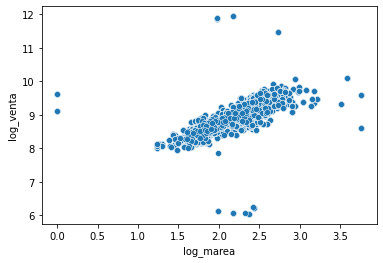

In [ ]:
sns.scatterplot(x=df['log_marea'],y=df['log_venta'])

In [ ]:
df2=df[(df['log_marea']>1)&(df["log_venta"]<11)&(df["log_venta"]>7)]

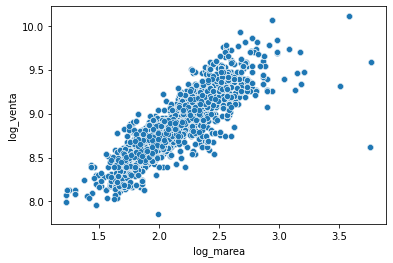

In [ ]:
sns.scatterplot(x=df2['log_marea'],y=df2['log_venta'])

In [ ]:
X = sm.add_constant(df2['log_marea'])
y=df2['log_venta']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_venta   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 2.435e+04
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:07:48   Log-Likelihood:                 2620.1
No. Observations:                8989   AIC:                            -5236.
Df Residuals:                    8987   BIC:                            -5222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8650      0.013    530.090      0.0

In [ ]:
model=smf.ols(formula='log_venta ~ log_marea',data=df2).fit()

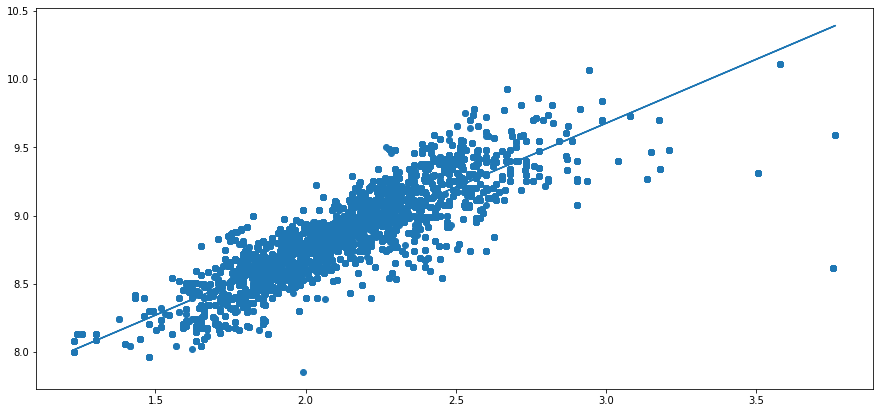

In [ ]:
ax,fig=plt.subplots(figsize=(15,7))
ax=plt.scatter(x=df2['log_marea'].values,y=df2['log_venta'].values)
ax=plt.plot(df2['log_marea'].values,model.fittedvalues)

In [ ]:
corr = df2.corr()
corr.style.background_gradient(cmap='viridis')

In [ ]:
bo = 6.8650
round(bo)

7

In [ ]:
b1=0.9371
round(b1,4)

0.9371

In [ ]:
def y_estimado_log(area):
     area=area
     y_estimado=bo+b1*area
     return round(y_estimado,2)

In [ ]:
y_est_log=y_estimado_log(2.238046)
y_est_log

8.96

In [ ]:
y_estimado=10**y_est_log

In [ ]:
df2.tail()

Unnamed: 0 mtipoinmueble  mvalorventa  marea mnrocuartos mnrobanos  \
9994         244   Apartamento    106000000   42.0           2         1   
9996         246          Casa    330000000   72.0           3         2   
9997         247          Casa   1200000000  400.0           3         4   
9998         248          Casa    642000000  191.0           4         4   
9999         249   Apartamento    380000000   79.3           3         2   

      mnrogarajes         mzona              mbarrio mnombrecomunbarrio  \
9994          0.0    Occidental         CAMPO ALEGRE          EL TINTAL   
9996          1.0         Norte           LA LIBERIA     LAS MARGARITAS   
9997          3.0         Norte          EL CONTADOR        El Contador   
9998          2.0  Noroccidente  CIUDAD JARDIN NORTE          Gratamira   
9999          2.0  Noroccidente       SANTA HELENA I       SANTA HELENA   

      log_venta  log_marea  
9994   8.025306   1.623249  
9996   8.518514   1.857332  
9997   9.079181   2.602060  
9998   8.807535   2.281033  
9999   8.579784   1.899273

In [ ]:
df2['y_estimado_log']=df2.log_marea.apply(func=y_estimado_log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

Unnamed: 0 mtipoinmueble  mvalorventa  marea mnrocuartos mnrobanos  \
0           0   Apartamento    385000000  100.0           3         2   
1           1   Apartamento    190810000   34.0           1         2   
2           2   Apartamento    720000000  157.0           3         4   
3           3          Casa   1018660600  173.0           3         4   
4           4   Apartamento   1850000000  190.0           3         4   

   mnrogarajes         mzona              mbarrio   mnombrecomunbarrio  \
0          1.0     Chapinero        ALFONSO LOPEZ             GALERIAS   
1          1.0         Norte            EL CODITO             EL REDIL   
2          2.0  Noroccidente            NIZA SUBA       Cerros De Niza   
3          1.0         Otros                  NaN                  NaN   
4          2.0         Norte  CERROS DE LOS ALPES  CERROS DE LOS ALPES   

   log_venta  log_marea  y_estimado_log  
0   8.585461   2.000000            8.74  
1   8.280601   1.531479            8.30  
2   8.857332   2.195900            8.92  
3   9.008030   2.238046            8.96  
4   9.267172   2.278754            9.00

In [ ]:
numero=0
def elevar(y,numero):
  y=numero**y
  return y

In [ ]:
elevar(3,numero)

1000

In [ ]:
#df2['y_estimado_valor']=df2.y_estimado_log.apply(func=elevar)
dataframe1 = df2.assign(y_estimado_valor = lambda x: (10**x['y_estimado_log']))

In [ ]:
dataframe1.head()

Unnamed: 0 mtipoinmueble  mvalorventa  marea mnrocuartos mnrobanos  \
0           0   Apartamento    385000000  100.0           3         2   
1           1   Apartamento    190810000   34.0           1         2   
2           2   Apartamento    720000000  157.0           3         4   
3           3          Casa   1018660600  173.0           3         4   
4           4   Apartamento   1850000000  190.0           3         4   

   mnrogarajes         mzona              mbarrio   mnombrecomunbarrio  \
0          1.0     Chapinero        ALFONSO LOPEZ             GALERIAS   
1          1.0         Norte            EL CODITO             EL REDIL   
2          2.0  Noroccidente            NIZA SUBA       Cerros De Niza   
3          1.0         Otros                  NaN                  NaN   
4          2.0         Norte  CERROS DE LOS ALPES  CERROS DE LOS ALPES   

   log_venta  log_marea  y_estimado_log  y_estimado_valor  
0   8.585461   2.000000            8.74      5.495409e+08  
1   8.280601   1.531479            8.30      1.995262e+08  
2   8.857332   2.195900            8.92      8.317638e+08  
3   9.008030   2.238046            8.96      9.120108e+08  
4   9.267172   2.278754            9.00      1.000000e+09

In [ ]:
dataframe1['y_estimado_valor'].describe()

count    8.989000e+03
mean     9.714680e+08
std      1.290621e+09
min      1.047129e+08
25%      4.466836e+08
50%      7.079458e+08
75%      1.148154e+09
max      2.454709e+10
Name: y_estimado_valor, dtype: float64

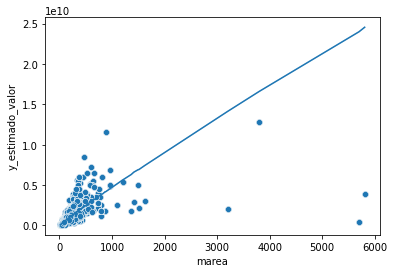

In [ ]:
sns.lineplot(x=dataframe1['marea'],y=dataframe1['y_estimado_valor'])
sns.scatterplot(x=dataframe1['marea'],y=dataframe1['mvalorventa'])


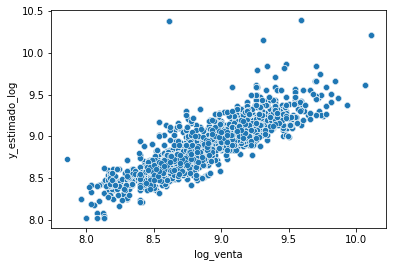

In [ ]:
sns.scatterplot(x=df2['log_venta'],y=df2['y_estimado_log'])

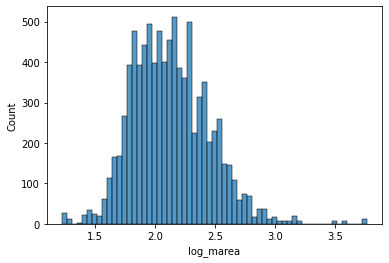

In [ ]:
sns.histplot(df2['log_marea'])

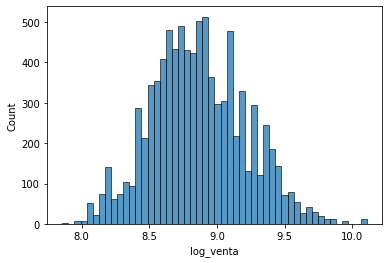

In [ ]:
sns.histplot(df2['log_venta'])

In [ ]:
pow(10,2)


100

In [ ]:
70**0.9371

53.58477029014386

In [ ]:
10**6.8650

7328245.331389044

In [ ]:
7328245.331389044*53.58477029014386

392682342.7123011